In [1]:
import pygad
import numpy
import math

In [2]:
#funkcja obliczajaca wytrzymalosc stopu
def endurance(x, y, z, u, v, w):
  return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

In [3]:
#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    return endurance(solution[0], solution[1], solution[2], solution[3], solution[4], solution[5])

fitness_function = fitness_func

In [4]:
#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = {"low": 0, "high": 1}

In [5]:
#ile chromosomów w populacji
#ile genow ma chromosom
sol_per_pop = 20
num_genes = 6

#ile wylaniamy rodzicow do "rozmnazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 10
num_generations = 60
keep_parents = 4

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 20

In [6]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

Parameters of the best solution : [0.68262829 0.63508582 0.98047886 0.98779491 0.02912207 0.08920307]
Fitness value of the best solution = 2.824004125975829
Predicted output based on the best solution : 2.824004125975829
Number of generations passed is 60


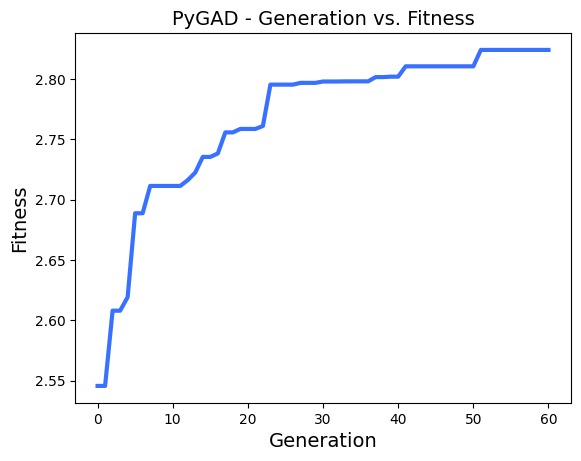

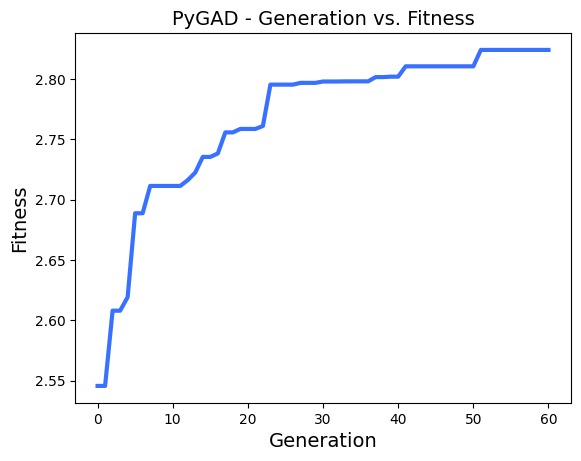

In [7]:
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = endurance(solution[0], solution[1], solution[2], solution[3], solution[4], solution[5])
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#liczba generacji algorytmu
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()